Final Run Statistics: --- 

 Number of steps                                 : 463
 Number of function evaluations                  : 578
 Number of Jacobian evaluations                  : 8
 Number of function eval. due to Jacobian eval.  : 24
 Number of error test failures                   : 23
 Number of nonlinear iterations                  : 574
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0352766641752 seconds.
Perturbation 1

Final Run Statistics: --- 

 Number of steps                                 : 251
 Number of function evaluations                  : 303
 Number of Jacobian evaluations                  : 5
 Number of function eval. due to Ja

 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0193639441915 seconds.
Perturbation 13

Final Run Statistics: --- 

 Number of steps                                 : 350
 Number of function evaluations                  : 448
 Number of Jacobian evaluations                  : 7
 Number of function eval. due to Jacobian eval.  : 21
 Number of error test failures                   : 19
 Number of nonlinear iterations                  : 444
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order   

Identifiability for Dataset 191 of 200: Original ID: 190

Identifiability for Dataset 192 of 200: Original ID: 191

Identifiability for Dataset 193 of 200: Original ID: 192

Identifiability for Dataset 194 of 200: Original ID: 193

Identifiability for Dataset 195 of 200: Original ID: 194

Identifiability for Dataset 196 of 200: Original ID: 195

Identifiability for Dataset 197 of 200: Original ID: 196

Identifiability for Dataset 198 of 200: Original ID: 197

Identifiability for Dataset 199 of 200: Original ID: 198

Identifiability for Dataset 200 of 200: Original ID: 199

Identifiability for Dataset 1 of 200: Original ID: 0

Identifiability for Dataset 2 of 200: Original ID: 1

Identifiability for Dataset 3 of 200: Original ID: 2

Identifiability for Dataset 4 of 200: Original ID: 3

Identifiability for Dataset 5 of 200: Original ID: 4

Identifiability for Dataset 6 of 200: Original ID: 5

Identifiability for Dataset 7 of 200: Original ID: 6

Identifiability for Dataset 8 of 200: Orig

Original Data sets that can detect 11 parameters: 5
Combination Data sets for more parameters: 0
Original Data sets that can detect 10 parameters: 0
Combination Data sets for more parameters: 0
Original Data sets that can detect 9 parameters: 10
Combination Data sets for more parameters: 1146
Original Data sets that can detect 8 parameters: 5
Combination Data sets for more parameters: 932
Original Data sets that can detect 7 parameters: 21
Combination Data sets for more parameters: 4319
Original Data sets that can detect 6 parameters: 5
Combination Data sets for more parameters: 798
Original Data sets that can detect 5 parameters: 37
Combination Data sets for more parameters: 7776
Original Data sets that can detect 4 parameters: 25
Combination Data sets for more parameters: 8591
Original Data sets that can detect 3 parameters: 63
Combination Data sets for more parameters: 27327
Original Data sets that can detect 2 parameters: 6
Combination Data sets for more parameters: 3981
Original D

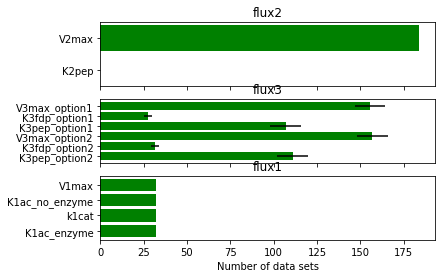

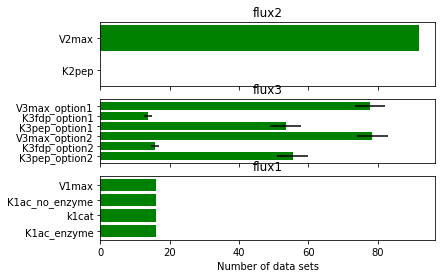

In [2]:
# script for kotte model identifiability with noise in input experimental data
import numpy as np
from generate_expdata import generate_expdata
from simulate_data import arrange_experimental_data
from kotte_model import establish_kotte_flux_identifiability
from process_ident_data import process_info_sample
from process_ident_data import parameter_plot_data_per_sample
from plot_ident_results import flux_parameter_plot

# generate noisy experimental data for testing identifiability
y0 = np.array([5, 1, 1])
# default parameter values
cvode_options = ('Newton', 'Adams', 1e-10, 1e-10, 200)
ode_parameter_values = np.array([.1, .1, 4e6, .1, .3, 1.1, .45, 2, .25, .2, 1, 1, 1, .1])

# get experimental system steady state data without noise
exp_xss, exp_fss, exp_ssid, perturbation_details = \
    generate_expdata(y0, cvode_options, ode_parameter_values, noise=1, number_of_samples=2)

# arrange experimental data to form multiple data sets
exp_flux_index = np.array([0, 3, 2, 4])
# choose numbr of experimental datasets for which identifiability is to be calculated
choose = range(0, 200)
# get combinations of experimental datasets
experimental_datasets = arrange_experimental_data(exp_xss, exp_fss, perturbation_details, 3, exp_flux_index, choose)

# identifiability for all kotte fluxes
ident_details = establish_kotte_flux_identifiability(experimental_datasets, choose=choose)
print('Perturbation analysis for identifiability complete.\n')

# data processing
data_list, original_data_ident, combo_data_ident, max_parameter = process_info_sample(ident_details,
                                                                                      experimental_datasets,
                                                                                      perturbation_details)
# get data for plots
total_ident_data, fraction_ident_data, all_boolean_p_id = parameter_plot_data_per_sample(original_data_ident, 1)
# plot
flux_parameter_plot(total_ident_data)
flux_parameter_plot(fraction_ident_data)